# Table of Contents

1. Introduction
2. Getting Started
3. Univariate Data
4. Multivariate Data
5. Machine Learning
6. Conclusion

# 1. Introduction

Hello and welcome to a new workbook in which I want to take some time and demonstrate a few of the many actions that can be performed via Python with a single dataset. This workbook is going to cover a variety of topics ranging from simple procedures such as directly graphing data to more advanced topics such as the use of machine learning. I plan on showcasing a variety of different methods and tricks so that hopefully, everyone can learn a thing or two.

I hope this notebook can be used as an inspiration point for newer data analysts who may be unsure on what project to work on. 

# 2. Getting Started

To begin, we will start by importing the necessary libraries that will be used throughout the entirity of this notebook. It is of course best practice to have the imports be located at the top of your script or notebook.

- Pandas : Pandas is one of the most essential libraries when it comes to data analysis. One of its biggest selling points comes tied with its ability to create dataframes in Python with ease.
- Collections : Collections is a library that is not very popular but is very useful when it comes to data analysis. I will elaborate on this library later
- Matplotlib.pyplot : Matplotlib is of course one of the most popular Python libraries that can be found. Allowing easy ways to create displays and visualizations.

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

## The Data

### Downloading The Data

For this notebook, I am going to be using a databse that consists of data from every natural disaster that has occurred in the United States between the years 1953 and 2021. This database can be found in its entirity through the following Kaggle link : [Download Here. 15.62 MB](https://www.kaggle.com/headsortails/us-natural-disaster-declarations)

### Importing Data 

Once the dataset has been locally downloaded you will want to unzip it and place the datasets in a folder. There will be more than one file but for this notebook, we are going to be using the *us_disaster_celarations.csv* file. To import it into Python, we simply use Pandas to import it and turn it into a pandas dataframe.

In [2]:
df = pd.read_csv('us_disaster_declarations.csv')

### Verifying Data

To make sure that the necessary and correct data has been imported, we can use a pandas function known as *head* to look at the first 5 rows of the dataframe. Doing so will allow us to take a peek into the dataframe to make sure it has been imported successfully.

In [3]:
df.head()

fema_declaration_string  disaster_number state declaration_type  \
0                 DR-1-GA                1    GA               DR   
1                 DR-2-TX                2    TX               DR   
2                 DR-3-LA                3    LA               DR   
3                 DR-4-MI                4    MI               DR   
4                 DR-5-MT                5    MT               DR   

       declaration_date  fy_declared incident_type         declaration_title  \
0  1953-05-02T00:00:00Z         1953       Tornado                   Tornado   
1  1953-05-15T00:00:00Z         1953       Tornado  Tornado & Heavy Rainfall   
2  1953-05-29T00:00:00Z         1953         Flood                     Flood   
3  1953-06-02T00:00:00Z         1953       Tornado                   Tornado   
4  1953-06-06T00:00:00Z         1953         Flood                    Floods   

   ih_program_declared  ia_program_declared  ...   incident_begin_date  \
0                    0                    1  ...  1953-05-02T00:00:00Z   
1                    0                    1  ...  1953-05-15T00:00:00Z   
2                    0                    1  ...  1953-05-29T00:00:00Z   
3                    0                    1  ...  1953-06-02T00:00:00Z   
4                    0                    1  ...  1953-06-06T00:00:00Z   

      incident_end_date disaster_closeout_date   fips place_code  \
0  1953-05-02T00:00:00Z   1954-06-01T00:00:00Z  13000          0   
1  1953-05-15T00:00:00Z   1958-01-01T00:00:00Z  48000          0   
2  1953-05-29T00:00:00Z   1960-02-01T00:00:00Z  22000          0   
3  1953-06-02T00:00:00Z   1956-02-01T00:00:00Z  26000          0   
4  1953-06-06T00:00:00Z   1955-12-01T00:00:00Z  30000          0   

   designated_area  declaration_request_number  \
0        Statewide                       53013   
1        Statewide                       53003   
2        Statewide                       53005   
3        Statewide                       53004   
4        Statewide                       53006   

                               hash          last_refresh  \
0  bbe78045bc2c18eabea13bd70bdd3fc8  2021-02-05T19:01:21Z   
1  fa79c2a0c1dd09facb9729ead357b422  2021-02-05T19:01:21Z   
2  ea34416dba7705f78eeee6356736ee3e  2021-02-05T19:01:21Z   
3  6bd9033a7634aa10b6fb455ddb40143c  2021-02-05T19:01:21Z   
4  f044c01fd5da9d437f5ddd208ed59126  2021-02-05T19:01:21Z   

                         id  
0  5f7b2be031a8c6681cfb4342  
1  5f7b2be031a8c6681cfb4345  
2  5f7b2be031a8c6681cfb4354  
3  5f7b2be031a8c6681cfb4357  
4  5f7b2be031a8c6681cfb4348  

[5 rows x 22 columns]

### Cleaning The Data

The dataset that we are using is relatively clean as of right now so there is not much cleaning to do. The only change that I am going to make is I am going to drop all values from the 2021 year. That way, we will only be able to look at data from years that have already been completed.

In [4]:
df.drop(df[df['fy_declared'] == 2021].index, inplace = True)

If you want further verifaction. Simply calling the dataframe will show a more extensive view of the dataframe showing the first few rows as well as the last few rows. The important thing to notice is that in the bottom left corner it states that there are 61,925 rows of data with 22 columns. If we look back at the original csv file from which this was imported from. We can see that the numbers match up and we are ready to go.

In [5]:
df

fema_declaration_string  disaster_number state declaration_type  \
0                     DR-1-GA                1    GA               DR   
1                     DR-2-TX                2    TX               DR   
2                     DR-3-LA                3    LA               DR   
3                     DR-4-MI                4    MI               DR   
4                     DR-5-MT                5    MT               DR   
...                       ...              ...   ...              ...   
60551              FM-5375-WY             5375    WY               FM   
60552              FM-5375-WY             5375    WY               FM   
60553              FM-5376-CA             5376    CA               FM   
60554              FM-5376-CA             5376    CA               FM   
60555              FM-5377-CA             5377    CA               FM   

           declaration_date  fy_declared incident_type  \
0      1953-05-02T00:00:00Z         1953       Tornado   
1      1953-05-15T00:00:00Z         1953       Tornado   
2      1953-05-29T00:00:00Z         1953         Flood   
3      1953-06-02T00:00:00Z         1953       Tornado   
4      1953-06-06T00:00:00Z         1953         Flood   
...                     ...          ...           ...   
60551  2020-09-26T09:27:00Z         2020          Fire   
60552  2020-09-26T09:27:00Z         2020          Fire   
60553  2020-09-27T13:59:00Z         2020          Fire   
60554  2020-09-27T13:59:00Z         2020          Fire   
60555  2020-09-28T17:55:00Z         2020          Fire   

              declaration_title  ih_program_declared  ia_program_declared  \
0                       Tornado                    0                    1   
1      Tornado & Heavy Rainfall                    0                    1   
2                         Flood                    0                    1   
3                       Tornado                    0                    1   
4                        Floods                    0                    1   
...                         ...                  ...                  ...   
60551               Mullen Fire                    0                    0   
60552               Mullen Fire                    0                    0   
60553                Glass Fire                    0                    0   
60554                Glass Fire                    0                    0   
60555                 Zogg Fire                    0                    0   

       ...   incident_begin_date     incident_end_date disaster_closeout_date  \
0      ...  1953-05-02T00:00:00Z  1953-05-02T00:00:00Z   1954-06-01T00:00:00Z   
1      ...  1953-05-15T00:00:00Z  1953-05-15T00:00:00Z   1958-01-01T00:00:00Z   
2      ...  1953-05-29T00:00:00Z  1953-05-29T00:00:00Z   1960-02-01T00:00:00Z   
3      ...  1953-06-02T00:00:00Z  1953-06-02T00:00:00Z   1956-02-01T00:00:00Z   
4      ...  1953-06-06T00:00:00Z  1953-06-06T00:00:00Z   1955-12-01T00:00:00Z   
...    ...                   ...                   ...                    ...   
60551  ...  2020-09-25T00:01:00Z  2020-10-19T23:59:00Z                    NaN   
60552  ...  2020-09-25T00:01:00Z  2020-10-19T23:59:00Z                    NaN   
60553  ...  2020-09-27T10:59:00Z                   NaN                    NaN   
60554  ...  2020-09-27T10:59:00Z                   NaN                    NaN   
60555  ...  2020-09-28T16:42:55Z                   NaN                    NaN   

        fips place_code  designated_area  declaration_request_number  \
0      13000          0        Statewide                       53013   
1      48000          0        Statewide                       53003   
2      22000          0        Statewide                       53005   
3      26000          0        Statewide                       53004   
4      30000          0        Statewide                       53006   
...      ...        ...              ...                         ...   
60551  56001      99001  Alban

## The Collections Library

The collections library is a library that is very useful in data analysis whenever data needs to be counted or grouped. Using the collections library, and more specifically the *Counter* function, allows us to skip the construction of for loops and creating our own dictionaries.

For example, for our first visualization, we want to determine which state has had the most natural disasters within the years 1953 and 2021. 

Normally, this may be a bit of a complicated task that would involve iterations through every row in the dataframe and counting each element, but with counters we can simply create a new variable which will create a dictionary with the count of every unique variable. So if we want to know which state has had the most natural disasters, we can simply count how many times each state has had a natural disaster. I know that sentence sounds reduntant; it was intentional. The Counter function will do the work for us and we simply call it through the following code.

In [6]:
count = collections.Counter(df['state'])

To determine what that actually did, we can simply print the variable.

In [7]:
print(count)

Counter({'TX': 4651, 'MO': 2670, 'VA': 2460, 'KY': 2416, 'OK': 2278, 'GA': 2239, 'FL': 2014, 'NC': 1949, 'LA': 1939, 'PR': 1825, 'IA': 1823, 'KS': 1682, 'MS': 1649, 'AL': 1620, 'AR': 1588, 'TN': 1522, 'MN': 1498, 'IN': 1451, 'CA': 1426, 'NE': 1423, 'NY': 1415, 'SD': 1381, 'ND': 1297, 'OH': 1281, 'IL': 1268, 'PA': 1226, 'WV': 1218, 'ME': 1010, 'WI': 892, 'WA': 862, 'SC': 855, 'MI': 791, 'CO': 640, 'MT': 586, 'NJ': 567, 'OR': 562, 'AK': 511, 'NM': 497, 'MD': 445, 'MA': 389, 'ID': 351, 'AZ': 323, 'VT': 314, 'NH': 294, 'NV': 270, 'UT': 241, 'CT': 228, 'WY': 128, 'RI': 102, 'HI': 96, 'VI': 79, 'AS': 75, 'MP': 63, 'MH': 53, 'DE': 50, 'FM': 31, 'DC': 22, 'GU': 19, 'PW': 1})


As mentioned, the Counter function creares a library of sorts that counts the amount of times an element is referred. I use the term "sorts" because if we take a look at what type the variable is and it is not a dictionary or list but rather a Counter class. To be able to extract the values and the labels you would call the keys and values functions respectively, which are functions of the Counter class.

# 3. Univariate Data

In [8]:
print(type(count))

<class 'collections.Counter'>


## Visualization 1 - Number of Disasters by State

For this first Visualization, we are going to use the values that were calculated from the Counter function and placing them in a bar chart. The reason we use a barchart is because the data that we are using is univariate. That's to say there is only one variable we are taking a look at for now and that is the state. To visualize we use the matplotlib library we imported earlier. This is the part where people can have a lot of creative freedom. For this purpose, I am going to leave a majority of things left to the default settings with the exception of some quality of life updates such as increasing the font size and changing the display size.

For more information, you can take a look at the matplotlib documentation. [Matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

Text(0.5, 1.0, 'Total Number of United States Natural Disasters by State Between 1953-2020')

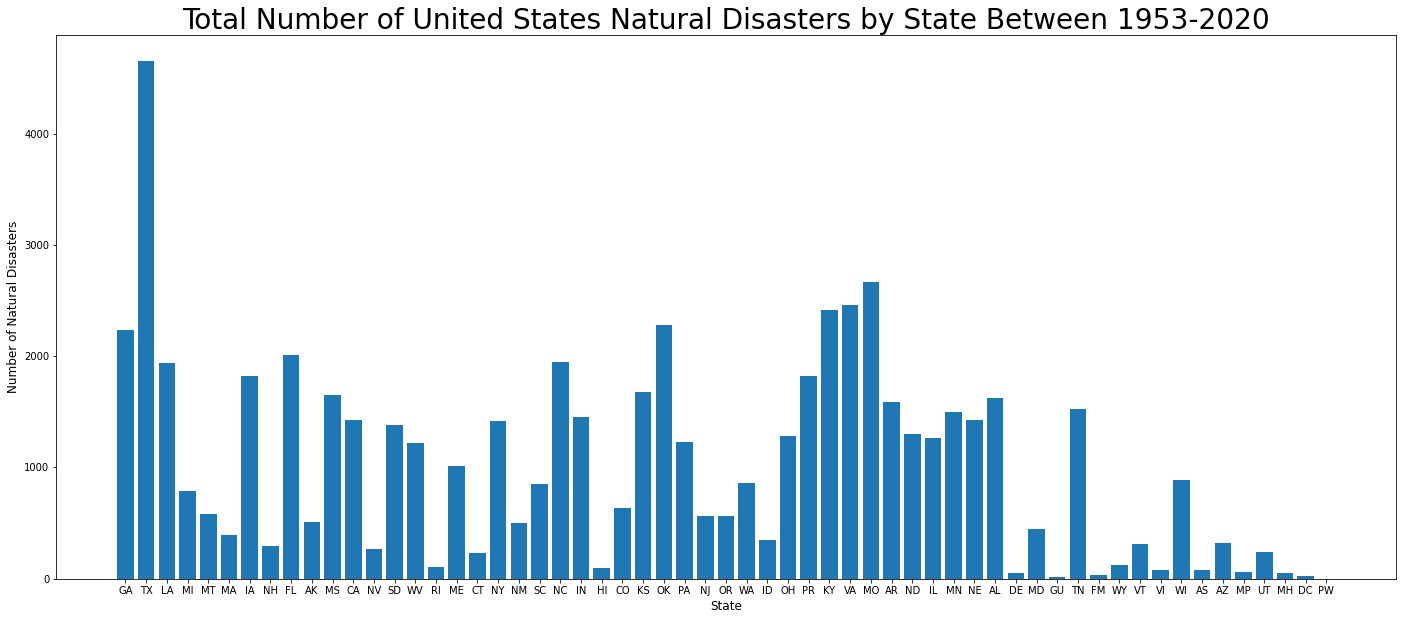

In [9]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(count.keys(), count.values())
ax.set_xlabel('State', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_title('Total Number of United States Natural Disasters by State Between 1953-2020', size = 28)

### Improvements

The plot that was displayed looks fine. There is definitely a lot of room for improvement. To begin with, I personally believe it is easier to look at and interpret a bar chart when the values are either ascending or descending. When the values are scattered aruond randomly, it is hard to understand what is happening at a glance. The purpose of visualizations is to make things easier for people and allow for clear and concise communications.

To fix this, we can simply rearrange the data and create a new plot with the values in descending order. To do this there is a bit of work that goes into it, but the outcome will be worth it. To begin, we will create a new dataframe with the Counter values. Once we create a pandas dataframe with those values, we can simply call the *sort_values* function which will sort the data for us.

In [10]:
state_df = pd.DataFrame((count.keys(), count.values()))
state_df = state_df.transpose()
state_df = state_df.sort_values(1, ascending = False)
state_df.columns = ('State', 'Number')

If we take a look at the head for the new dataframe we create, we can easily see that the numbers are now in descending order, which is what we wanted.

In [11]:
state_df.head()

State Number
1     TX   4651
36    MO   2670
35    VA   2460
34    KY   2416
26    OK   2278

We can now plot the rearranged data.

Text(0.5, 1.0, 'Total Number of United States Natural Disasters by State Between 1953-2020')

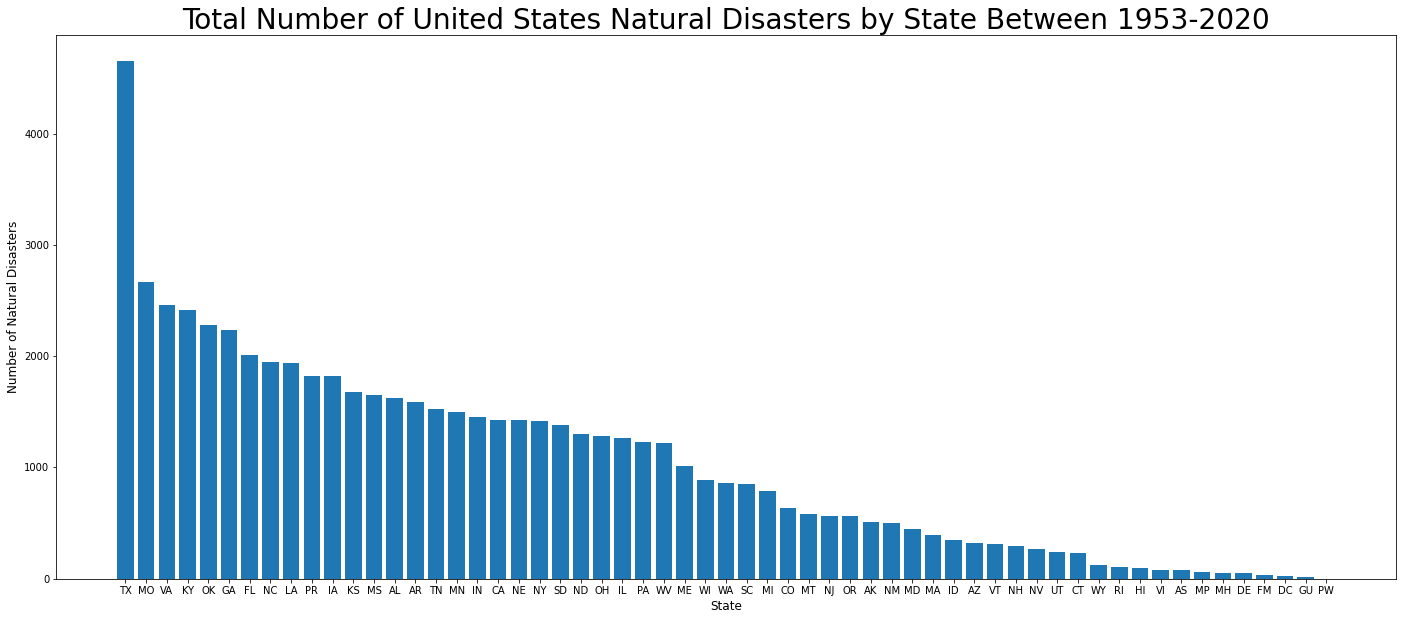

In [12]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(state_df['State'], state_df['Number'])
ax.set_xlabel('State', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_title('Total Number of United States Natural Disasters by State Between 1953-2020', size = 28)

This new plot is alraedy a lot better than the original version. Sorting the data in a descending manner allows for an intuitive and easy to understand graph. Without needing to think much we can now clearly see that Texas has endured the most natural disasters and the next state, Missouri, is not close. From this visualization alone, one could take on the task of determining why Texas seems to be the most impacted state.

## Visualization 2 - Types of Natural Disasters

Let's shift over from states, to the actual natural disasters themselves. We are going to essentially repeat the same process that we did for counting states but instead count the types of natural disasters.

In [13]:
disaster_count = collections.Counter(df['incident_type'])
disaster_df = pd.DataFrame((disaster_count.keys(), disaster_count.values()))
disaster_df = disaster_df.transpose()
disaster_df = disaster_df.sort_values(1, ascending = False)
disaster_df.columns = ('Incident', 'Number')

In [14]:
print(disaster_count)

Counter({'Severe Storm(s)': 16951, 'Hurricane': 11619, 'Flood': 10390, 'Biological': 8022, 'Snow': 3659, 'Fire': 3468, 'Severe Ice Storm': 1990, 'Tornado': 1464, 'Drought': 1292, 'Coastal Storm': 570, 'Freezing': 301, 'Other': 297, 'Earthquake': 227, 'Typhoon': 130, 'Volcano': 51, 'Fishing Losses': 42, 'Mud/Landslide': 31, 'Dam/Levee Break': 13, 'Toxic Substances': 9, 'Tsunami': 9, 'Chemical': 9, 'Human Cause': 7, 'Terrorist': 5})


Similar to before, we also sort the data beforehand to ensure a clear graph.

In [15]:
disaster_df.head()

Incident Number
7   Severe Storm(s)  16951
5         Hurricane  11619
1             Flood  10390
22       Biological   8022
12             Snow   3659

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

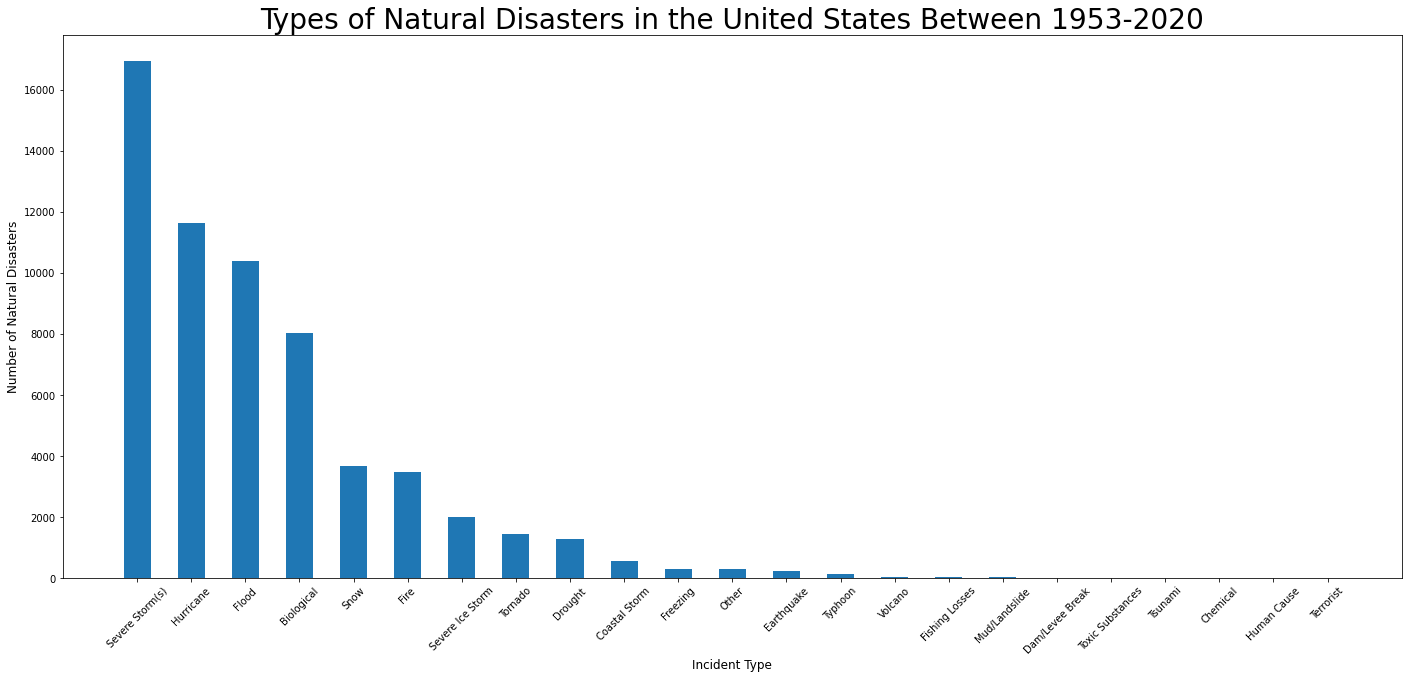

In [16]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(disaster_df['Incident'], disaster_df['Number'], width = 0.5)
ax.set_xlabel('Incident Type', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_title('Types of Natural Disasters in the United States Between 1953-2020', size = 28)
plt.xticks(rotation=45)

The graph that was produced is very straightforward. We can clearly see that Severe Storms are hte main culprit when it comes to natural disasters. However, we run into a different issue than before. It is important to try to get the full picture from a single image. From this graph, it is very difficult to see what is going on with the lower end. It is difficult to get important infomration. This is an issue with scaling.

*Note: The labels on the X axis were also rotated by 45 degrees to ensure a readable axis.*

## Semi-Log

To fix our issue with this display. We can simply turn the plot into a semi-log plot. That is to say that one of the axes will be logorithmic. It only makes sense to convert the Y-Axis into a logorithmic scale and we can do that by adding the 

```pip
plt.semilogy(True)
```
to the code that creates our plot.

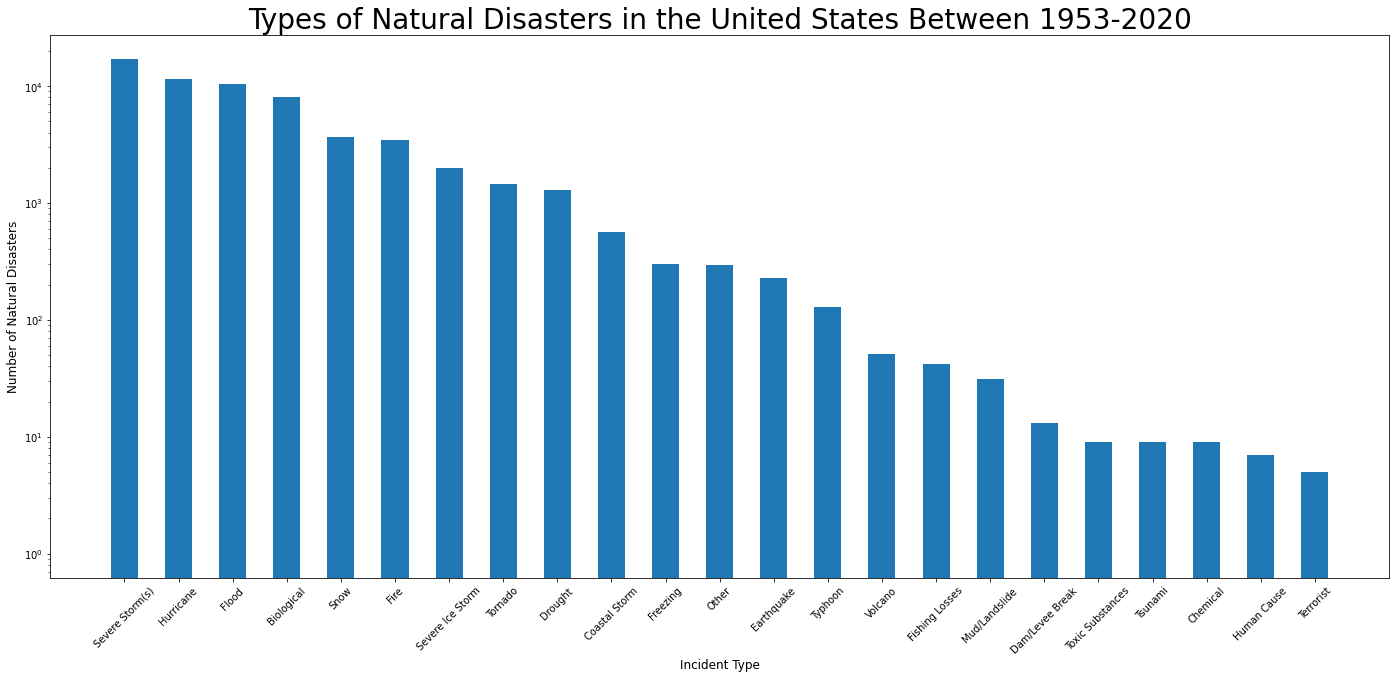

In [17]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(disaster_df['Incident'], disaster_df['Number'], width = 0.5)
ax.set_xlabel('Incident Type', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_title('Types of Natural Disasters in the United States Between 1953-2020', size = 28)
plt.xticks(rotation=45)
plt.semilogy(True)

This is a much easier plot to digest and we can see how the values at the lower end compare with the rest of the values in a clearer way.

# 4. Multivariate Data

For this visualization, we are going to move towards the realm of multivariate data as opposed to univariate data.

## Multivariate?

The reason the following visualization is going to be multivariate is due to the fact that we are going to be comparing multiple variables instead of a single variable. We are going to be comparing how each the frequency of multiple types of natural disasters change throughout the years.

## Selecting The Data

For this visualization, we do not need to arrange the data based on the count, but rather the year.

In [18]:
yearly_df = collections.Counter(df['fy_declared'])

In [19]:
print(yearly_df)

Counter({2020: 9658, 2005: 4661, 2011: 2684, 2008: 2456, 2019: 1902, 2004: 1894, 2017: 1835, 1993: 1773, 1996: 1750, 2003: 1662, 2010: 1637, 1998: 1504, 2009: 1430, 2001: 1372, 1999: 1367, 2007: 1337, 2013: 1200, 1977: 1196, 2018: 1006, 2006: 1002, 2016: 969, 2002: 956, 1997: 936, 2000: 901, 2015: 869, 1973: 852, 2012: 835, 2014: 765, 1994: 674, 1974: 612, 1990: 589, 1976: 559, 1965: 545, 1995: 535, 1991: 521, 1969: 516, 1979: 509, 1972: 494, 1975: 482, 1989: 470, 1978: 452, 1992: 451, 1986: 363, 1984: 297, 1983: 242, 1971: 230, 1987: 207, 1967: 194, 1980: 192, 1985: 152, 1968: 149, 1970: 149, 1966: 124, 1988: 100, 1982: 97, 1981: 66, 1963: 25, 1955: 20, 1956: 18, 1957: 18, 1964: 18, 1962: 16, 1954: 14, 1960: 13, 1961: 11, 1953: 10, 1959: 7, 1958: 6})


In [20]:
yearly_df = pd.DataFrame((yearly_df.keys(), yearly_df.values()))
yearly_df = yearly_df.transpose()
yearly_df = yearly_df.sort_values(1, ascending = False)
yearly_df.columns = ('Year', 'Number')

Text(0.5, 1.0, 'Total Number of United States Natural Disasters Between 1953-2020')

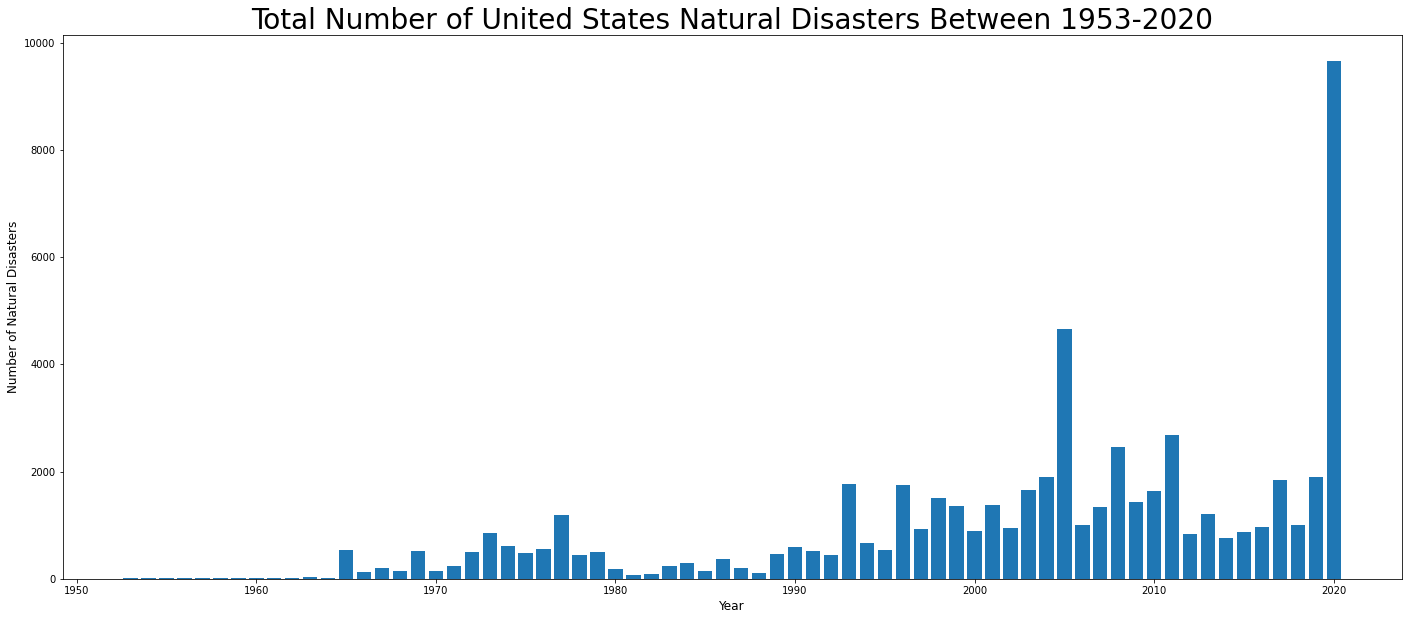

In [21]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(yearly_df['Year'], yearly_df['Number'])
ax.set_xlabel('Year', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_title('Total Number of United States Natural Disasters Between 1953-2020', size = 28)

The graph that is produced is a good starting point. It states that there is a large spike in incidents in the year 2020 in comparison to the other years. Being that biological incidents are included in the dataset, we can assume that most of the cases recorded in 2020 are due to the COVID-19 epidemic.

## Relating Back To Previous Work

If we look back at Visualization 2, we can see that biological incidents rank #4 in terms of the most incidents reported falling behind, severse storms, hurricanes, and floods. Subsequentially, let's track these four incident types throughout the years.

### Why not *every* incident type?

The reason we are not going to be tracking every single type of incident type throughout the years is simply due to the fact that the graph would appear to congested. This wouldn't be an issue if we were using a dynamic display such as that of a web application, in which the user can choose which incident type to observe. But when using a static display, such as that of an HTML display or paper, then we do not have the luxuray of picking and choosing what data we want to analyze. As a result, using the top 4 will allow an interesting graph nonetheless.

If one wants to create a dynamic version of this dataset, that would be a great project. However, that is beyond the scope of this notebook.

## Cleaning Up The data

Taking a quick glance of the most recent bar chart, there appear to be fewer incidents recorded as you travel back in time. This could be due to not having data recorded as frequently, there simply weren't as many natural disasters occuring at the time, or some other issue. Whatever the reason may be, we want our data to be as accurate and as *clean* as possible. For this reason, I have decided to take a look at the data recorded only between the years 2010-2020. This is not required and I have chosen this as a way to demonstrate custom axes and data cleaning.

### Custom Axes

If we do not want to drop rows from the dataframe, we can simply change the axes of the plot throught matplotlib with the line

```pip
ax.set_xlim(x0, x1)
```

If you would like to change the y axis, then you would use the following line of code:

```pip
ax.set_ylim(y0, y1)
```

Text(0.5, 1.0, 'Total Number of United States Natural Disasters Between 1953-2020')

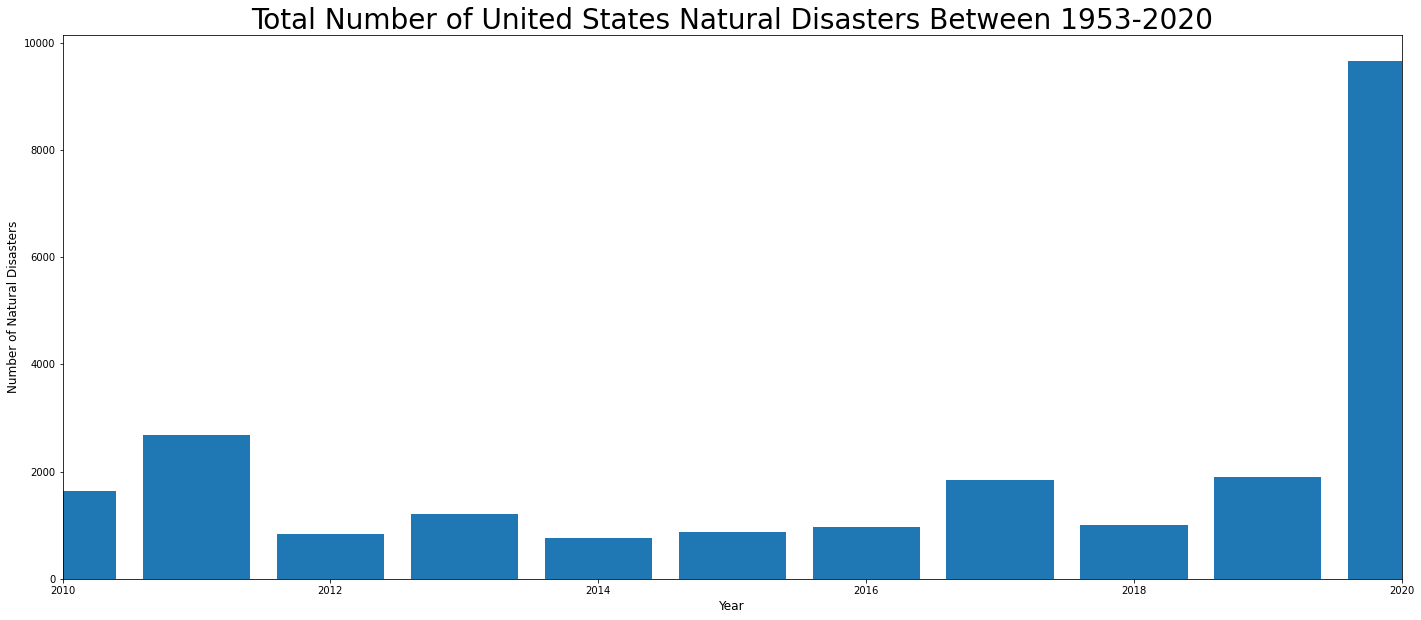

In [22]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(yearly_df['Year'], yearly_df['Number'])
ax.set_xlabel('Year', size = 12)
ax.set_ylabel('Number of Natural Disasters', size = 12)
ax.set_xlim(2010, 2020)
ax.set_title('Total Number of United States Natural Disasters Between 1953-2020', size = 28)

This works fine, however, for the sake of being efficient, I am going to simply drop the years before 2020 so that I do not have to keep loading up data that will not be used.

In [23]:
recent_df = df.drop(df[df['fy_declared'] < 2010].index)


In [24]:
filter_ = recent_df['incident_type'].isin(['Severe Storm(s)', 'Hurricane', 'Flood', 'Biological'])
recent_df = recent_df[filter_]

In [25]:
recent_df.head()

fema_declaration_string  disaster_number state declaration_type  \
37203              DR-1861-AR             1861    AR               DR   
37204              DR-1861-AR             1861    AR               DR   
37205              DR-1861-AR             1861    AR               DR   
37206              DR-1861-AR             1861    AR               DR   
37207              DR-1861-AR             1861    AR               DR   

           declaration_date  fy_declared    incident_type  \
37203  2009-12-03T16:15:00Z         2010  Severe Storm(s)   
37204  2009-12-03T16:15:00Z         2010  Severe Storm(s)   
37205  2009-12-03T16:15:00Z         2010  Severe Storm(s)   
37206  2009-12-03T16:15:00Z         2010  Severe Storm(s)   
37207  2009-12-03T16:15:00Z         2010  Severe Storm(s)   

                            declaration_title  ih_program_declared  \
37203  Severe Storms, Tornadoes, And Flooding                    0   
37204  Severe Storms, Tornadoes, And Flooding                    0   
37205  Severe Storms, Tornadoes, And Flooding                    0   
37206  Severe Storms, Tornadoes, And Flooding                    0   
37207  Severe Storms, Tornadoes, And Flooding                    0   

       ia_program_declared  ...   incident_begin_date     incident_end_date  \
37203                    0  ...  2009-10-29T00:00:00Z  2009-11-08T00:00:00Z   
37204                    0  ...  2009-10-29T00:00:00Z  2009-11-08T00:00:00Z   
37205                    0  ...  2009-10-29T00:00:00Z  2009-11-08T00:00:00Z   
37206                    0  ...  2009-10-29T00:00:00Z  2009-11-08T00:00:00Z   
37207                    0  ...  2009-10-29T00:00:00Z  2009-11-08T00:00:00Z   

      disaster_closeout_date  fips place_code    designated_area  \
37203   2019-05-08T23:59:00Z  5009      99009     Boone (County)   
37204   2019-05-08T23:59:00Z  5011      99011   Bradley (County)   
37205   2019-05-08T23:59:00Z  5013      99013   Calhoun (County)   
37206   2019-05-08T23:59:00Z  5015      99015   Carroll (County)   
37207   2019-05-08T23:59:00Z  5023      99023  Cleburne (County)   

       declaration_request_number                              hash  \
37203                        9121  03da01f2fdf5b138b900f52f9ad8d38f   
37204                        9121  18429821fbd5ed3246c1cd6472108220   
37205                        9121  1edb12b5aeb2d2e44aab738448f0b159   
37206                        9121  645e225445bdaba60086c0f70ab9c668   
37207                        9121  b2491014926cf6054be9e6fbe9f292f9   

               last_refresh                        id  
37203  2021-02-05T19:02:18Z  5f7b2c0331a8c6681cfd1ccd  
37204  2021-02-05T19:02:18Z  5f7b2c0331a8c6681cfd1cce  
37205  2021-02-05T19:02:18Z  5f7b2c0331a8c6681cfd1cd3  
37206  2021-02-05T19:02:18Z  5f7b2c0331a8c6681cfd1cdb  
37207  2021-02-05T19:02:18Z  5f7b2c0331a8c6681cfd1cde  

[5 rows x 22 columns]

## Re-Count

Being that we are now working with a new database, we are going to have to recount the incdent frequency. However, this time it is going to be a little more tricky. The reason for that is we do not want the overall frequency number, rather, we want the incident frequency per year. To do this, we take a count of how many incidents occurred for every year as well as taking a count of how many incidents of the selected type occurred.

In [26]:
year_count = collections.Counter(recent_df.fy_declared)
incident_count = collections.Counter(recent_df.incident_type)

In [27]:
print(incident_count.keys())
print(year_count.keys())

dict_keys(['Severe Storm(s)', 'Hurricane', 'Flood', 'Biological'])
dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


## Multiple Dataframes

There are multiple ways to store the data that we collected. For simplicity, I am going to create different dataframes for each incident type. There are more efficient and elegant ways to go about this but I felt that for demonstrative purposes, this route was one of the most clear.

In [28]:
storm_df = recent_df[recent_df.incident_type == 'Severe Storm(s)']
hurricane_df = recent_df[recent_df.incident_type == 'Hurricane']
flood_df = recent_df[recent_df.incident_type == 'Flood']
biological_df = recent_df[recent_df.incident_type == 'Biological']

In [29]:
storm_count = collections.Counter(storm_df.fy_declared)
hurricane_count = collections.Counter(hurricane_df.fy_declared)
flood_count = collections.Counter(flood_df.fy_declared)
biological_count = collections.Counter(biological_df.fy_declared)

In [30]:
storm_df = pd.DataFrame((storm_count.keys(), storm_count.values()))
storm_df = storm_df.transpose()

hurricane_df = pd.DataFrame((hurricane_count.keys(), hurricane_count.values()))
hurricane_df = hurricane_df.transpose()

flood_df = pd.DataFrame((flood_count.keys(), flood_count.values()))
flood_df = flood_df.transpose()

biological_df = pd.DataFrame((biological_count.keys(), biological_count.values()))
biological_df = biological_df.transpose()


In [31]:
hurricane_df.head()

0    1
0  2010   91
1  2011  546
2  2012  183
3  2013  573
4  2016   26

## Visualization 3 - Subplots

Multivariate data can be visualized in multiple ways. For this first incident, I am going to be using multiple subplots in a single figure. Sublots are great ways to separate values into its own "mini" figure which is a great way to organize the results.

In the following example, I create subplots using matplotlib and since we are tracking four different incidents, I am going to create a figure with four different plots organized in a 2x2 display. This, like most of the othre code and choices in this notebook, can be customized by the user to fit their needs and preferences. With that being said, let us begin by only filling in a single subplot.

### Selecting a subplot

When creating the overall figure, you are also returned a second value which in my case is labeled *ax*. ax in my case represents the subplots. If I want to add data or customize the subplot that is located on the bottom right, then I can specify that subplot by specifying the coordinate of that subplot with respect to the figure. That is to say that the bottom right subplot can be located with the coordinates [[1,1]]. If I wanted to work on the subplot that is found in the top right corner of the figure, then I would use the coordinates [[0,1]].

Text(0.5, 0.98, 'United States Natural Disasters Between 2010-2020')

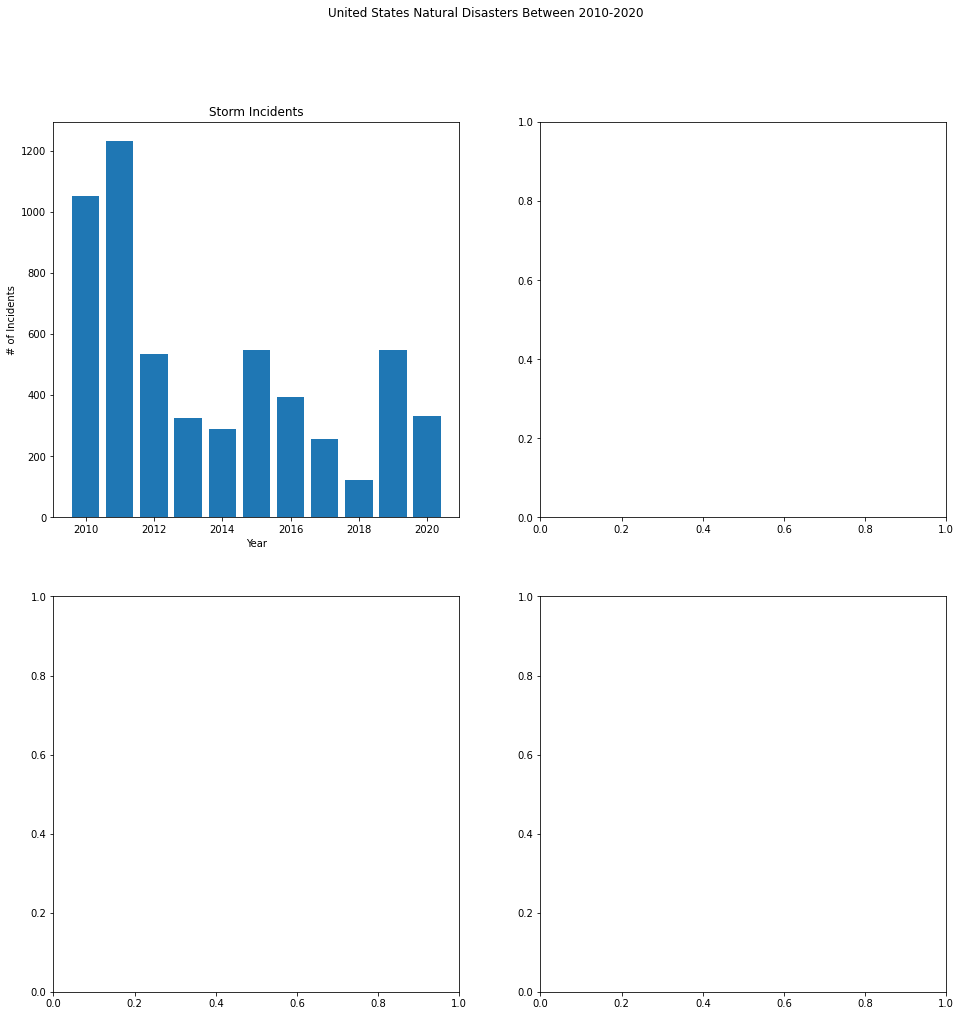

In [32]:
fig, ax = plt.subplots(2,2, figsize = (16,16))
ax[0,0].bar(storm_df[0], storm_df[1])
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('# of Incidents')
ax[0,0].set_title('Storm Incidents')

plt.suptitle('United States Natural Disasters Between 2010-2020')

I am satisfied with the layout of the subplots. From here we can fill in the rest of the subplots.

### Customizing Subplots

Despite the figure having multiple subplots and an extra dimension. Subplots can be customized and altered the same way as before.

Text(0.5, 0.98, 'United States Natural Disasters Between 2010-2020')

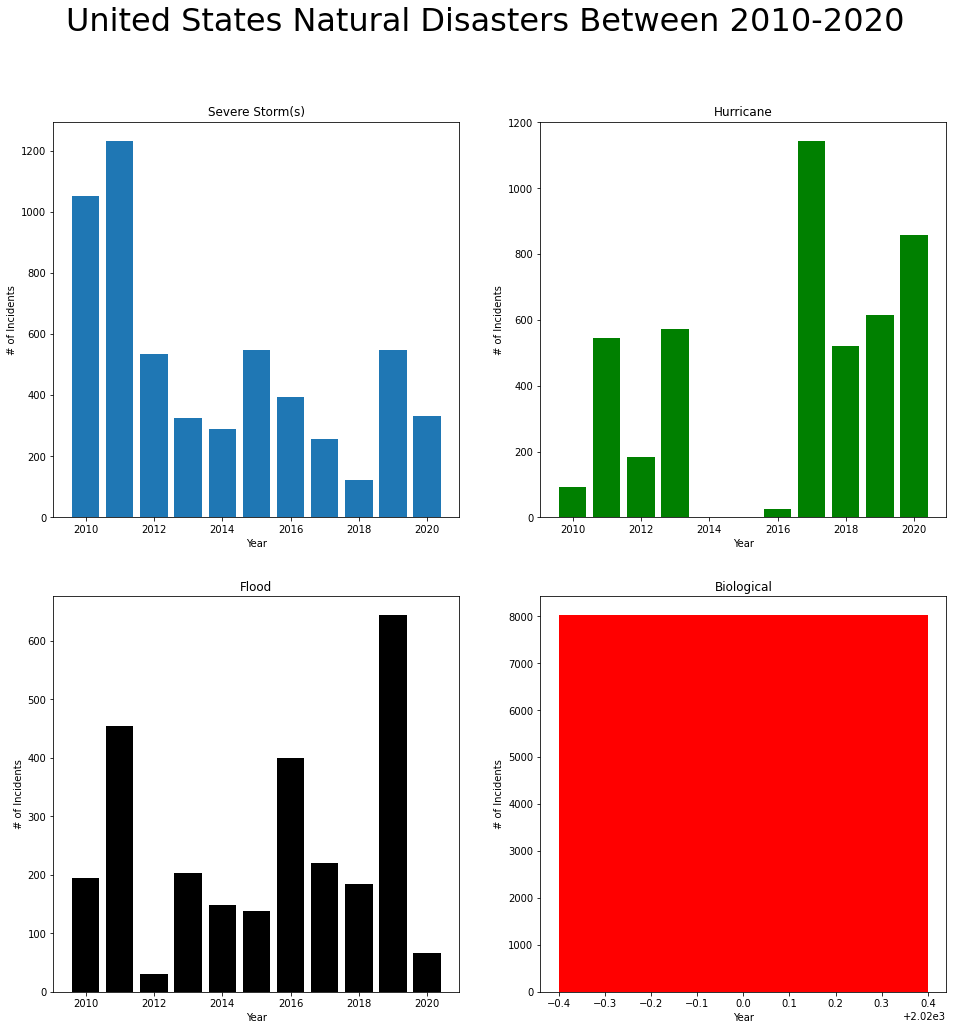

In [33]:
fig, ax = plt.subplots(2,2, figsize = (16,16))
ax[0,0].bar(storm_df[0], storm_df[1])
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('# of Incidents')
ax[0,0].set_title('Severe Storm(s)')

ax[0,1].bar(hurricane_df[0], hurricane_df[1], color = 'green')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('# of Incidents')
ax[0,1].set_title('Hurricane')

ax[1,0].bar(flood_df[0], flood_df[1], color = 'black')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('# of Incidents')
ax[1,0].set_title('Flood')

ax[1,1].bar(biological_df[0], biological_df[1], color = 'red')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('# of Incidents')
ax[1,1].set_title('Biological')

plt.suptitle('United States Natural Disasters Between 2010-2020', size = 32)

### Troubleshooting

There seems to be an issue when it comes to the biological subplot, it doesn't look at at all like the other three. Upon closer inspection we can see that the x-axis does not coincide with the other values. Takinga  look at the dataframe we created for it confirms that there is no data recorded for years other than 2020.

In [34]:
biological_df

0     1
0  2020  8022

Unfortunately, this dataframe can not be used for our purposes. That is not to say that the data collected is not valueable, but rather, it does not fit our needs. Perhaps in another notebook, we will able to use the biological dataframe. As a result, we are going to replace the biological data with data relating to snow incidenets. We can simply repeat the earlier process to create a new dataframe.

In [35]:
recent_df = df.drop(df[df['fy_declared'] < 2010].index)
filter_ = recent_df['incident_type'].isin(['Snow'])
recent_df = recent_df[filter_]
year_count = collections.Counter(recent_df.fy_declared)
incident_count = collections.Counter(recent_df.incident_type)
snow_df = recent_df[recent_df.incident_type == 'Snow']
snow_count = collections.Counter(snow_df.fy_declared)
snow_df = pd.DataFrame((snow_count.keys(), snow_count.values()))
snow_df = snow_df.transpose()

In [36]:
snow_df

0    1
0  2010  205
1  2011  106
2  2013   23
3  2015   54
4  2016   74
5  2017   55
6  2018   39

Let's add the new data to our existing figure.

Text(0.5, 0.98, 'United States Natural Disasters Between 2010-2020')

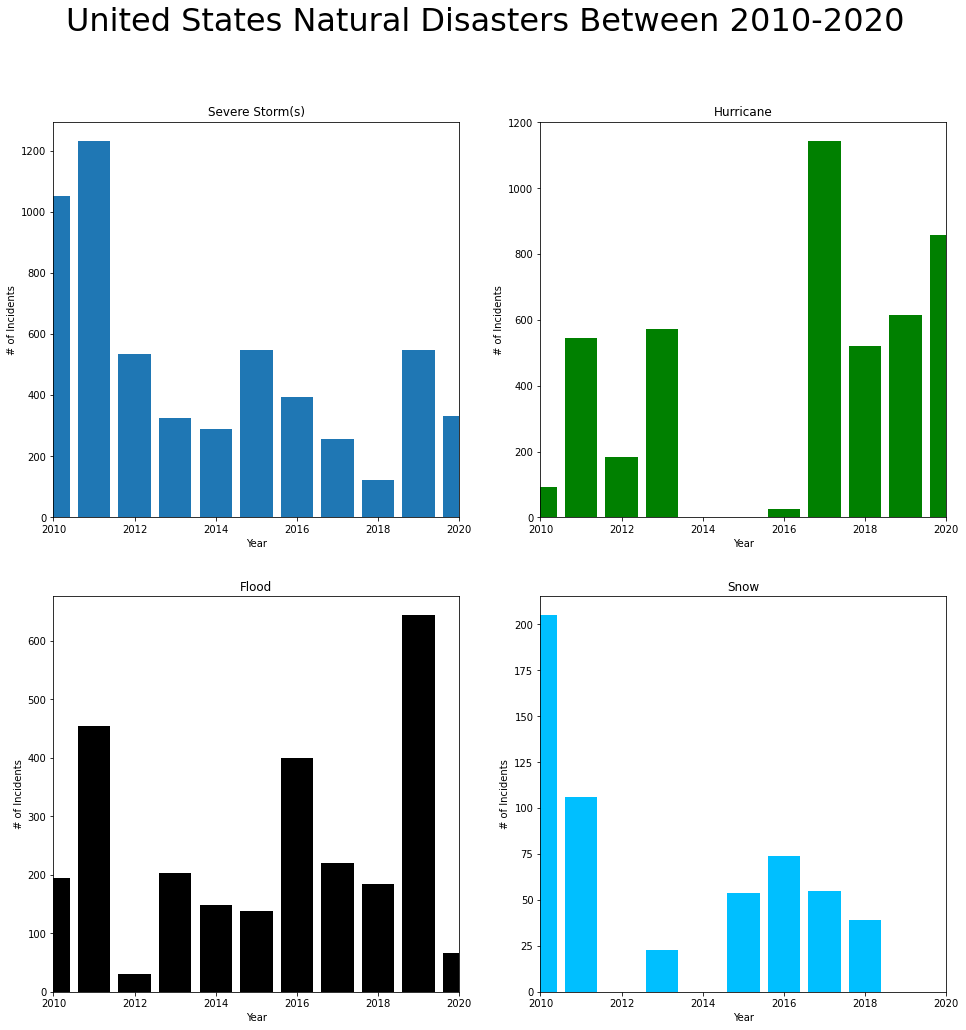

In [37]:
fig, ax = plt.subplots(2,2, figsize = (16,16))
ax[0,0].bar(storm_df[0], storm_df[1])
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('# of Incidents')
ax[0,0].set_title('Severe Storm(s)')
ax[0,0].set_xlim(2010,2020)

ax[0,1].bar(hurricane_df[0], hurricane_df[1], color = 'green')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('# of Incidents')
ax[0,1].set_title('Hurricane')
ax[0,1].set_xlim(2010,2020)

ax[1,0].bar(flood_df[0], flood_df[1], color = 'black')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('# of Incidents')
ax[1,0].set_title('Flood')
ax[1,0].set_xlim(2010,2020)

ax[1,1].bar(snow_df[0], snow_df[1], color = 'deepskyblue')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('# of Incidents')
ax[1,1].set_title('Snow')
ax[1,1].set_xlim(2010,2020)

plt.suptitle('United States Natural Disasters Between 2010-2020', size = 32)

With the addition of the snow dataframe, we are able to create a more complete figure that makes sense. From here we are free to draw whatever conclusions we feel would be appropriate. Fpr example we can simply state that snow incidents are not as common as severe storm incidents. There is always work that can be done such as creating a consistent y-axis for all subplots. However, as a starter figure, this works!

## Visualization 4 - Multiple Variables, One Plot

### Bar Plot

There are multiple ways to display multivariate data on a single plot. One of thos ebeing bar plots, I am personally not a huge fan of them when it comes to multivariate data but I figured it would be important to showcase them. 

Layering the data on top of each other is not a good approach as it is hard to follow and can leave out crucial information.

Text(0.5, 0.98, 'United States Natural Disasters Between 2010-2020 [layered]')

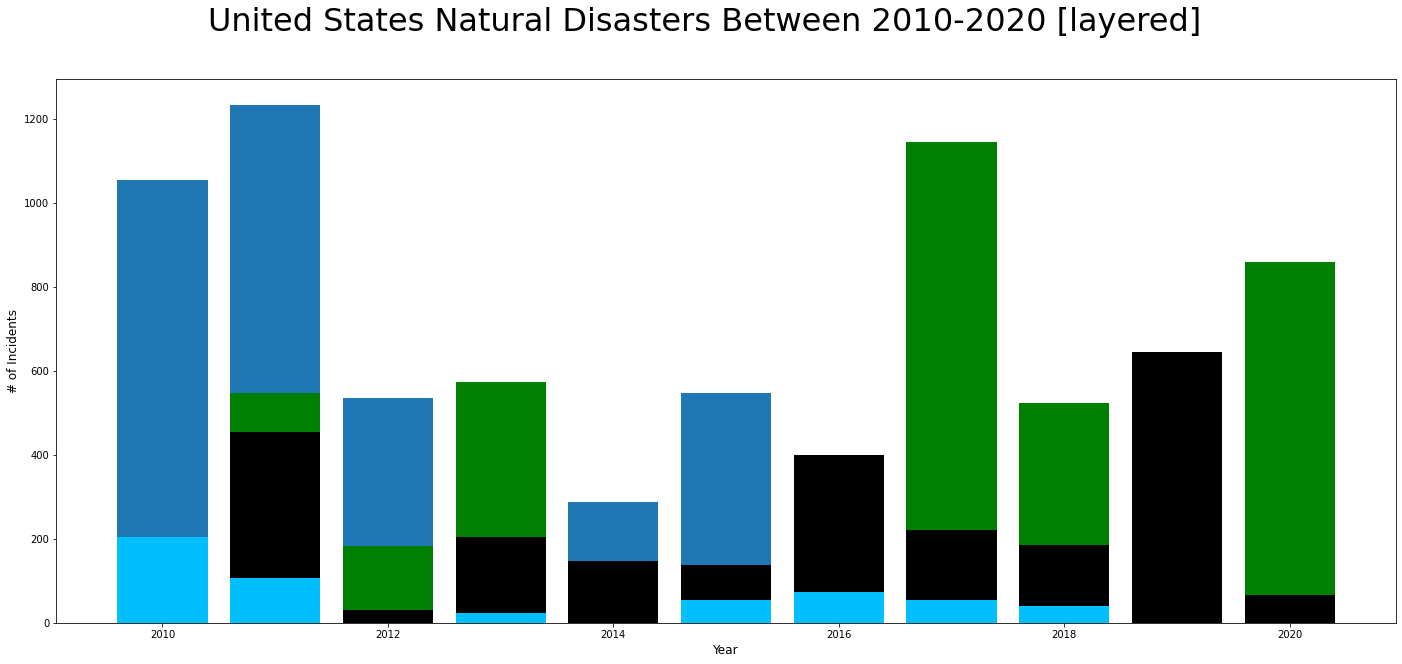

In [38]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(storm_df[0], storm_df[1])

ax.bar(hurricane_df[0], hurricane_df[1], color = 'green')

ax.bar(flood_df[0], flood_df[1], color = 'black')

ax.bar(snow_df[0], snow_df[1], color = 'deepskyblue')

ax.set_xlabel('Year', size = 12)
ax.set_ylabel('# of Incidents', size = 12)

plt.suptitle('United States Natural Disasters Between 2010-2020 [layered]', size = 32)

A common technique that is used when displaying bivariate or multivariate data on a bar plot is by **stacking** the data. The only caveat is that the data has to be of the same shape which is why for the following example, the hurricane and snow data is commented out. To stack the data you simply include the 
```pip
... , bottom = df , ...
```
argument to the bar plot function. In this example, df represents which data you want beneath the aforementioned dataset.

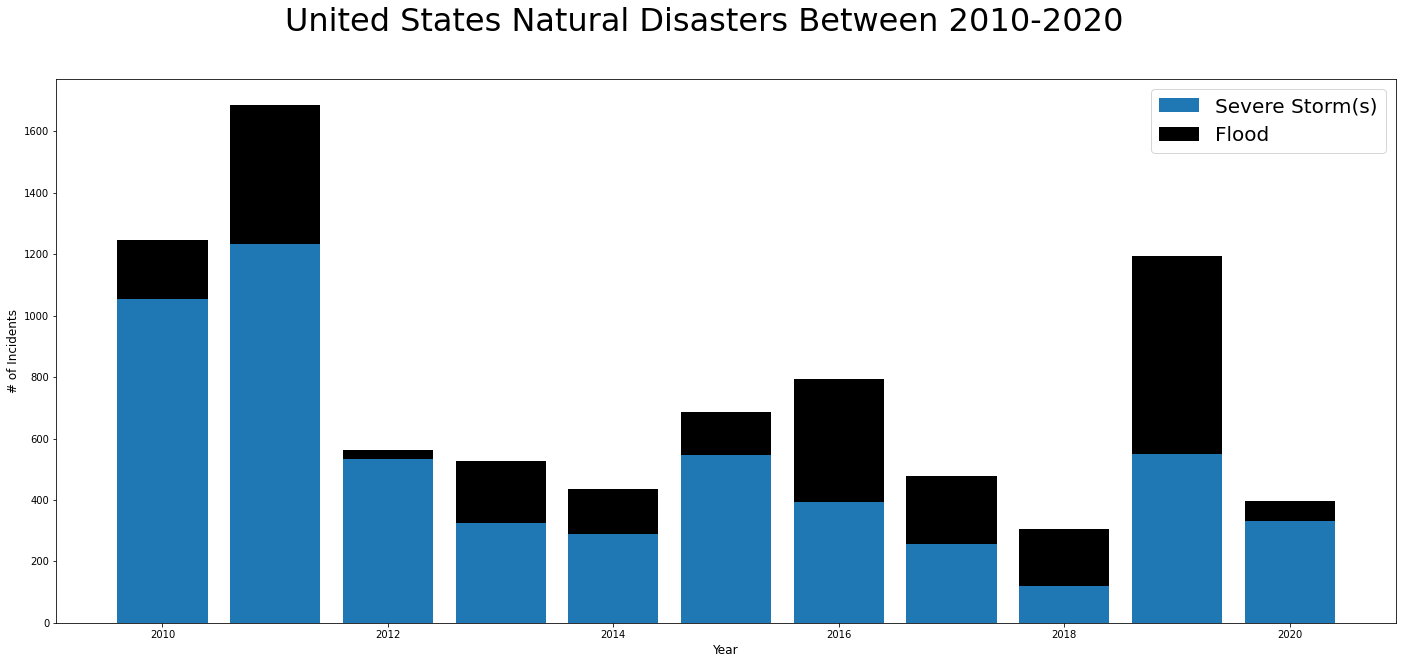

In [39]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.bar(storm_df[0], storm_df[1], label = 'Severe Storm(s)')

# ax.bar(hurricane_df[0], hurricane_df[1], color = 'green')

ax.bar(flood_df[0], flood_df[1], bottom = storm_df[1], color = 'black', label = 'Flood')

# ax.bar(snow_df[0], snow_df[1], color = 'deepskyblue')

ax.set_xlabel('Year', size = 12)
ax.set_ylabel('# of Incidents', size = 12)

plt.suptitle('United States Natural Disasters Between 2010-2020', size = 32)
plt.legend(loc = 1, prop={'size': 20})

### Scatter Plots

I personally am a fan of scatter plots. I believe they are great ways to convey infromation while also keeping plots clean and organized. There are multiple ways to create scatter plots depending on the data. For data as simple as what we are working with at the moment, we can simply create a scatter plot with the points connected to try to indicate any type of trend. 

When working with large datsets, scatter plots can be helpful if trying to denote trends or clusters.

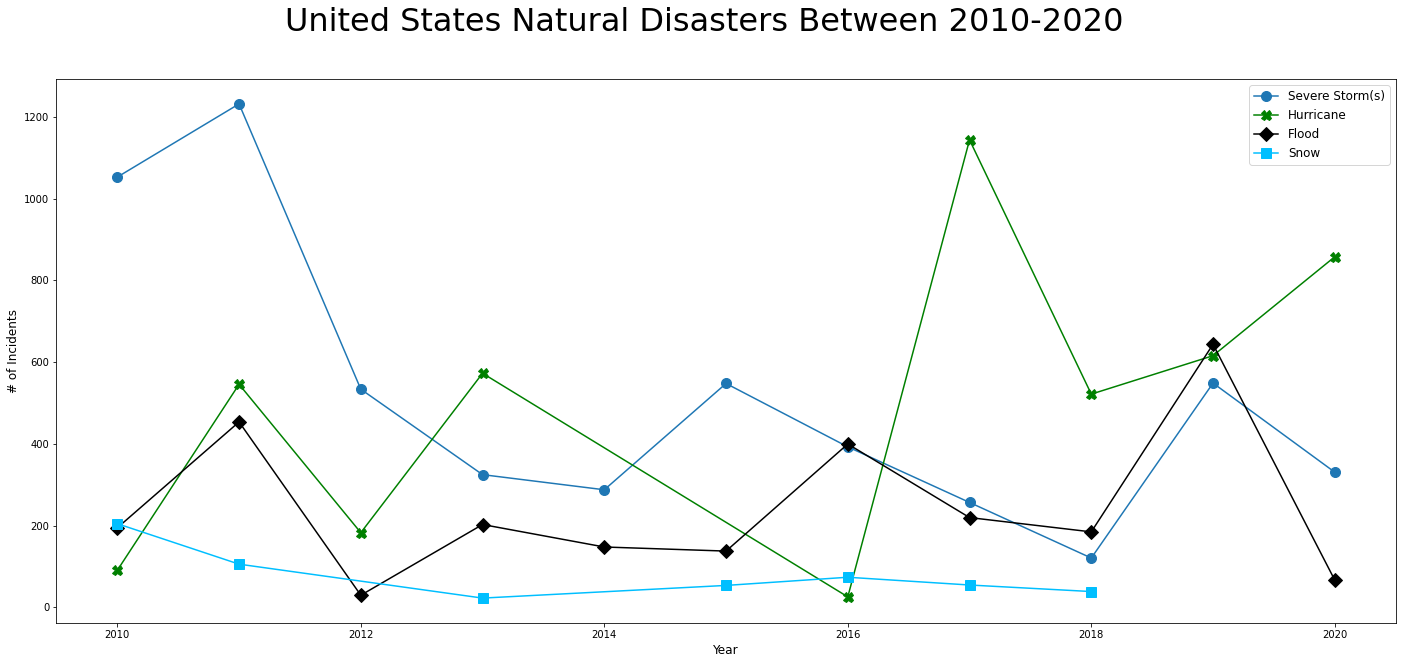

In [40]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.plot(storm_df[0], storm_df[1], marker = 'o', ms = 10, label = 'Severe Storm(s)')

ax.plot(hurricane_df[0], hurricane_df[1], marker = 'X', ms = 10, color = 'green', label = 'Hurricane')

ax.plot(flood_df[0], flood_df[1], marker = 'D', ms = 10, color = 'black', label = 'Flood')

ax.plot(snow_df[0], snow_df[1], marker = 's', ms = 10, color = 'deepskyblue', label = 'Snow')
ax.set_xlabel('Year', size = 12)
ax.set_ylabel('# of Incidents', size = 12)
plt.suptitle('United States Natural Disasters Between 2010-2020', size = 32)
plt.legend(loc = 1, prop={'size': 12})

# 5. Machine Learning

For the final part of the notebook, we are going to dive into the world of machine learning. Machine learning is a great way to gather information that would otherwise by difficult or sometimes impossible for a human to detect. This could be due to having to work in multiple dimensions or just having datasets that are too large to manage. I have an entire github repositoray dedicated to teaching machine learning methods via python, and it is for that reason that I will not be going too in depth in this notebook.

[ML Notebooks](https://github.com/MichaelPantojaCodes/ML-Notebooks)

## The Data 

When it comes to machine learning, it is of course important to understand what the data we are working with looks like. The way we started this entire notebook is the same way we are going to start the machine learning section; by looking at the head of the original dataframe.

In [41]:
df.head()

fema_declaration_string  disaster_number state declaration_type  \
0                 DR-1-GA                1    GA               DR   
1                 DR-2-TX                2    TX               DR   
2                 DR-3-LA                3    LA               DR   
3                 DR-4-MI                4    MI               DR   
4                 DR-5-MT                5    MT               DR   

       declaration_date  fy_declared incident_type         declaration_title  \
0  1953-05-02T00:00:00Z         1953       Tornado                   Tornado   
1  1953-05-15T00:00:00Z         1953       Tornado  Tornado & Heavy Rainfall   
2  1953-05-29T00:00:00Z         1953         Flood                     Flood   
3  1953-06-02T00:00:00Z         1953       Tornado                   Tornado   
4  1953-06-06T00:00:00Z         1953         Flood                    Floods   

   ih_program_declared  ia_program_declared  ...   incident_begin_date  \
0                    0                    1  ...  1953-05-02T00:00:00Z   
1                    0                    1  ...  1953-05-15T00:00:00Z   
2                    0                    1  ...  1953-05-29T00:00:00Z   
3                    0                    1  ...  1953-06-02T00:00:00Z   
4                    0                    1  ...  1953-06-06T00:00:00Z   

      incident_end_date disaster_closeout_date   fips place_code  \
0  1953-05-02T00:00:00Z   1954-06-01T00:00:00Z  13000          0   
1  1953-05-15T00:00:00Z   1958-01-01T00:00:00Z  48000          0   
2  1953-05-29T00:00:00Z   1960-02-01T00:00:00Z  22000          0   
3  1953-06-02T00:00:00Z   1956-02-01T00:00:00Z  26000          0   
4  1953-06-06T00:00:00Z   1955-12-01T00:00:00Z  30000          0   

   designated_area  declaration_request_number  \
0        Statewide                       53013   
1        Statewide                       53003   
2        Statewide                       53005   
3        Statewide                       53004   
4        Statewide                       53006   

                               hash          last_refresh  \
0  bbe78045bc2c18eabea13bd70bdd3fc8  2021-02-05T19:01:21Z   
1  fa79c2a0c1dd09facb9729ead357b422  2021-02-05T19:01:21Z   
2  ea34416dba7705f78eeee6356736ee3e  2021-02-05T19:01:21Z   
3  6bd9033a7634aa10b6fb455ddb40143c  2021-02-05T19:01:21Z   
4  f044c01fd5da9d437f5ddd208ed59126  2021-02-05T19:01:21Z   

                         id  
0  5f7b2be031a8c6681cfb4342  
1  5f7b2be031a8c6681cfb4345  
2  5f7b2be031a8c6681cfb4354  
3  5f7b2be031a8c6681cfb4357  
4  5f7b2be031a8c6681cfb4348  

[5 rows x 22 columns]

Some of the columns seem to be left out. No problem, we can simply use the following command to take a look at the data.

In [42]:
df.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'hash', 'last_refresh',
       'id'],
      dtype='object')

## Where To Begin

There are a large number of different models that complete different tasks in different ways. It is for that raeson that the field of Machine Learning is so large and is constantly expanding. With that being said, it is important to familiarize ones self with common models so that we can have expansive repertoire, or toolbox, of methods we can use. When picking a model, there are a few things to conisder: what does the data look like, what am I trying to compute, what is the most efficient way to approach a problem. 

Let us say that we are trying to create a model that can predict what state a natural disaster occurred based on limited information. How might we go about it? A big factor that almost halves our selection pool is the fact that the data we have available to us is *labeled*. This means that we are able to make use of supervised machine learning methods.

### Supervised vs Unsupervised Learning

The difference between supervised and unsupervised learning has already been alluded to. Supervised learning means that the data alraedy has a label attached to it. That is to say, we already know what the data is supposed like. For example, if we are trying to study for a chemistry exam through supervised learning, then that is to say that when solving practice problems, we are able to look at the answer and determine if we are right or wrong.

Unsupervised learning on the other hand consists of data that is not labeled. Using the same chemistry exam example as before, it would be like solving practice problems but not knowing if you are right or wrong. 

From this description, one may wonder why people would use unsupervised machine learning methods. The answer can be found by looking at real world data. It will be rare to find a dataset that has all the data already labeled and neatly organized. In fact, unsupervised machine learning actually **help** label the data.

## Picking a Model

We now know what the data looks like and know what our task is. When trying to predict the label of a datapoint, this is known as a *classification* problem. We are trying to correctly classify the data. One of the most common and easiest to undertand classification model is known as K-Nearest Neighbor, or KNN. I am not going to go into detail on how it works for I have already create a notebook relating to it, feel free to check it out!

[KNN Tutorial](https://github.com/MichaelPantojaCodes/ML-Notebooks/blob/main/knn-tutorial.ipynb)

## Filtering Data

Not all the information is important or helpful when it comes to KNN. In fact, too much data can lead to overfitting and actually decrease the accuracy of our model. In this instance we are going to choose only a few columns of the dataframe to use.

In [43]:
train_df = df[['fy_declared', 'incident_type', 'declaration_title', 'designated_area']]
train_df_labels = df[['state']]

### Labels?

The labels are just as important to the datafame as the data itself. Labels are what we are trying to predict so it goes without saying that we need to keep track of which labels coincide with which rows of data. You do not need to create a different dataframe for labels but I chose to just to clearly illustrate the point.

In [44]:
train_df.head()

fy_declared incident_type         declaration_title designated_area
0         1953       Tornado                   Tornado       Statewide
1         1953       Tornado  Tornado & Heavy Rainfall       Statewide
2         1953         Flood                     Flood       Statewide
3         1953       Tornado                   Tornado       Statewide
4         1953         Flood                    Floods       Statewide

In [45]:
train_df_labels.head()

state
0    GA
1    TX
2    LA
3    MI
4    MT

## Factorization

Machine Learning models typically like to work with numbers, not strings. Pandas allow us to transfrom the strings into unique integers which can then be used to train our model better.

In [59]:
train_df_labels.state = pd.factorize(train_df_labels.state)[0]

In [60]:
train_df_labels

state
0          0
1          1
2          2
3          3
4          4
...      ...
60551     48
60552     48
60553     11
60554     11
60555     11

[60556 rows x 1 columns]

From here we can see that the states have been transformed into integers. We can now repeat the process with the rest of the columns involving strings.

In [62]:
train_df.incident_type = pd.factorize(train_df.incident_type)[0]
train_df.declaration_title = pd.factorize(train_df.declaration_title)[0]
train_df.designated_area = pd.factorize(train_df.designated_area)[0]


In [63]:
train_df.head()

fy_declared  incident_type  declaration_title  designated_area
0         1953              0                  0                0
1         1953              0                  1                0
2         1953              1                  2                0
3         1953              0                  0                0
4         1953              1                  3                0

## Importing The Model

I know I mentioned at the beginning that it is best practice to include all imports at the top of the script, but I wanted to highlight the importance of these two libraries that are being used.

- train_test_split : This library allows us to split our data into two different dataframes. The reason we want to do that is due to the fact that once we train our model, we need to test it to ensure the accuracy is up to a standard that we are happy with.

- KNeighborClassifer : This library is the actual KNN model that we are going to be using.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [65]:
x_train, x_test, y_train, y_test = train_test_split(train_df, train_df_labels,test_size= 0.2)

As mentioned earlier, we are going to split the dataframe up so that we have a separate dataframe to test our models accuracy. It is common to use what is known as an 80/20 split when spliiting data. That is to say that we are going to train 80% of the entire dataframe and use the reaming 20% of the dataframe to test the model.

## Neighbors

Neighbors is what makes KNN, KNN. The number of neighbors is the number of values that the new data point is being compared with. If this sounds confusing, I highly recommend the KNN Tutorial I linked earlier. 

In [66]:
neighbors = 17

## Creating the Model

Is is at this point that create the actual classifcation model. Fortunately, it is as simple as creating one line of code.

In [67]:
model = KNeighborsClassifier(n_neighbors = neighbors)

## Training The Model

Now that the model has been imported, we are free to input the training data we split earlier. Alongside this we also include the training labels that were also split.

### Ravel

Is is important to notice that we factorized the data earlier, what was returned was an array that was created as a vertical vector. While these are accepted by the model, is is best to unravel it to create an array that is more friendly with the model.

In [68]:
model.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=17)

## Testing the Model

Now that the model has been trained, we can now test the accuract of the model by getting the score of our model with the testing data we split earlier.

In [69]:
score = model.score(x_test, y_test)
score = round(score, 4)
print(f'This model is {score * 100}% accurate.')

This model is 49.43% accurate.


The results are . . . not very good. That's okay! This is the first iteration and there is a lot of work that can be done to increase the schore. Machine learning engineers spend a lot more time finidng good data, cleaning data, and messing with parameters in comparison to running machine leanring models. So while our intiial accuracy was not very good, it should only get better from here.

# 6. Conclusion

Thank you so much for taking the time to look through this notebook, I hope it was clear and informative. The solutions and codes used could always be improved as there is always room for improvement but I hope that this works as a good starting place for newer data analysts. 

This notebook took a long time to organize and get together so feedback of any kind would be much appreciated.

```
email - michaelxpantoja [at] gmail . com
```